In [1]:
import TSML

In [2]:
import numpy as np
import matplotlib.pyplot as plt

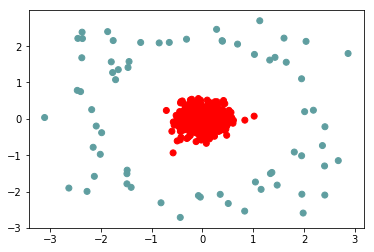

In [35]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

def cost(y,p):
    Err=[]
    zeros=np.where(y==0)
    ones=np.where(y==1)
    Err=np.hstack((-y[ones]*np.log(p[ones]),-(1-y[zeros])*np.log(1-p[zeros])))
    return np.mean(Err)

data=np.random.randn(500,2)
data2=(25./100.)*np.random.randn(500,2)

circle=np.array([[x[0],x[1]] for x in data if (np.sqrt(x[0]**2+x[1]**2)>2.0)])
circle2=np.array(data2)
data2=np.hstack((circle2,np.zeros((circle2.shape[0],1))))
data=np.hstack((circle,np.ones((circle.shape[0],1))))
X=np.vstack((data,data2))
np.random.shuffle(X)
y=X[:,-1:]
X=X[:,:-1]

colors=["red","cadetblue"]

np.array(np.argmax(y,axis=1).reshape(-1))

plt.scatter([X[:,0]],[X[:,1]], color=np.array(colors)[np.array(y.reshape(-1)).astype(int)])

In [36]:
def ReLU(X):
    return X*(X>0)

def deReLU(Z):
    return Z>0

def dertanh(X):
    return 1-np.power(np.tanh(X),2)

In [37]:
nodes=[100]*2+[1]
activations=[np.tanh]*2+[sigmoid]
act_ders=[dertanh]*2

In [38]:
X_train=X[:int(X.shape[0]*85/100),:].astype(float)
X_val=X[int(X.shape[0]*85/100):,:].astype(float)

y_train=y[:int(y.shape[0]*85/100),:].astype(float)
y_val=y[int(y.shape[0]*85/100):,:].astype(float)

In [39]:
np.unique(y_val)

array([0., 1.])

In [46]:
model=TSML.NeuralNet(nodes,X_train.shape[1],activations,act_ders,cost,task="Classification",scaleweights=False, seed=200)
tr_error=[]
val_error=[]
for i in range(1,21):
    model.weightinit()
    model.train(X_train[:int(X_train.shape[0]*(5*i)/100)],y_train[:int(X_train.shape[0]*(5*i)/100)],1000,1e-4,X_val,y_val)
    tr_error.append(model.error[-1])
    val_error.append(model.valerror[-1])


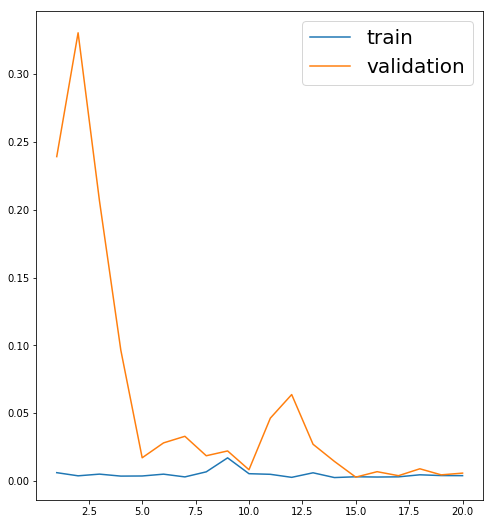

In [47]:
plt.figure(figsize=(8,9))
plt.plot(range(1,len(tr_error)+1), tr_error, label="train", )
plt.plot(range(1,len(val_error)+1), val_error, label="validation")
plt.legend(fontsize=20)